# The HR diagram

This assignment is about stars...

We will work with a star catalogue of 240 stars described by the following information:

- Temperature (in Kelvin)
- Luminosity (L/Lo)
- Radius (R/Ro)
- Absolute magnitude (Mv)

We also have the following data for each star:

- Color (Red/Orange/Yellow/White/Blue)
- Spectral class ('A', 'B', 'F', 'G', 'K', 'M', 'O')
- Star type (Brown dwarf/Red dwarf/White dwarf/Main sequence/Supergiant/Hypergiant)

This dataset has been collected by [Deepraj Baidya](https://github.com/deepraj1729) and was originally published on [Kaggle](https://www.kaggle.com/deepu1109/star-dataset). 

In [47]:
import urllib.request
urllib.request.urlretrieve("https://raw.githubusercontent.com/nshaud/ml_for_astro/main/stars.csv", "stars.csv")

('stars.csv', <http.client.HTTPMessage at 0x7d3e63caab10>)

In [48]:
import pandas as pd
df_stars = pd.read_csv("stars.csv")

In [49]:
df_stars

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,Brown Dwarf,Red,M
1,3042,0.000500,0.1542,16.60,Brown Dwarf,Red,M
2,2600,0.000300,0.1020,18.70,Brown Dwarf,Red,M
3,2800,0.000200,0.1600,16.65,Brown Dwarf,Red,M
4,1939,0.000138,0.1030,20.06,Brown Dwarf,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,Hypergiant,Blue,O
236,30839,834042.000000,1194.0000,-10.63,Hypergiant,Blue,O
237,8829,537493.000000,1423.0000,-10.73,Hypergiant,White,A
238,9235,404940.000000,1112.0000,-11.23,Hypergiant,White,A


Star classification is something that can be done based on rules depending on temperature and luminosity. For example, Wikipedia gives the following example of a Hertzsprung-Russell diagram:

![](https://upload.wikimedia.org/wikipedia/commons/6/6b/HRDiagram.png)

In [50]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
# Assign unique integers from 0 to 6 to each star type
df_stars['Star type'] = le.fit_transform(df_stars['Star type'])
labels = le.inverse_transform(df_stars['Star type'])
class_names = le.classes_
print(class_names)



['Brown Dwarf' 'Hypergiant' 'Main Sequence' 'Red Dwarf' 'Supergiant'
 'White Dwarf']


In [70]:
import warnings
warnings.filterwarnings("ignore")

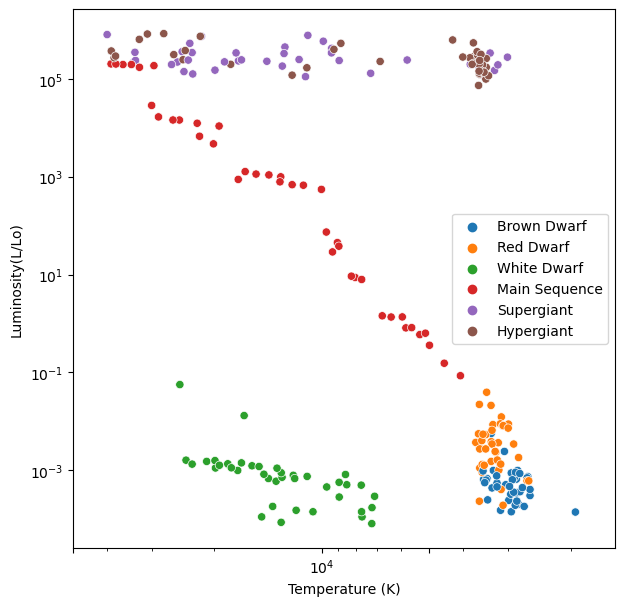

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(7, 7))
sns.scatterplot(data=df_stars, x='Temperature (K)', y='Luminosity(L/Lo)', hue=labels)

plt.xscale('log')
plt.yscale('log')
plt.xticks([5000, 10000, 50000])
plt.xlim(5e4, 1.5e3)
plt.show()

We find the same organization of stars in this 2D plane. Main Sequence stars and White Dwarves are fairly easy to isolate from the rest: a statistical model should be able to easily classify them. Based only on Luminosity and Temperature, Dwarf stars and Giant stars have higher intra-group variability: Supergiant and Hypergiant cover the same space (same for Brown and Red Dwarves). Additionnal variables might be needed to correctly identify the types of those stars.

- Apply PCA to the dataset at your disposa (hint: don't use columns with labels, only those with real numbers).
- Project the dataset into the principal components, and do a scatter plot of the first two. 
- This will look terrible. Think about the units!
- Explore what happens if you rescale the data first.

**This is actually a very important lesson in machine learning**: Massaging your data before giving them to an algorithm can make things much much better.

- You can try an linear, affine transformation such that each dimension goes between -1 and 1.
- Or (which is [the usual machine-learning approach](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)) standardize your data such that each dimension has mean=0 and variance=1. 
- Redo your PCA. Should be much much better.
- How much variance is explained by those two components?



### For later: come back to this assignment after lecture 20
- Now run a supervised classification algorithm on this dataset. 
- Can you predict the stellar type? How well? Careful with overfitting of course.

In [72]:
import numpy as np
T = df_stars['Temperature (K)'].to_numpy()
L = df_stars['Luminosity(L/Lo)'].to_numpy()
R = df_stars['Radius(R/Ro)'].to_numpy()
M = df_stars['Absolute magnitude(Mv)'].to_numpy()

X = np.column_stack((T, L, R, M))

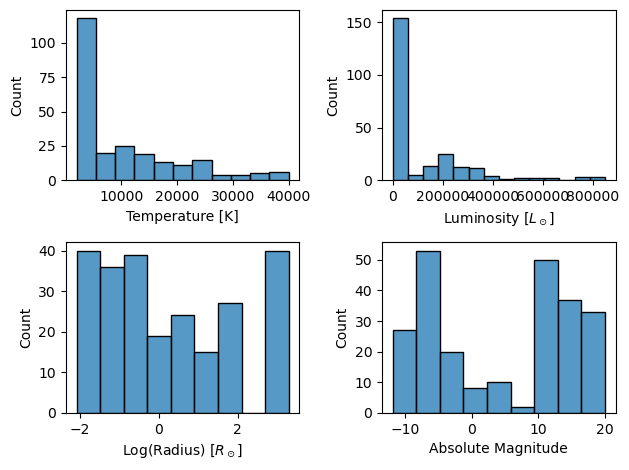

In [73]:
import seaborn as sns
from matplotlib import pyplot as plt

fig,ax = plt.subplots(2,2)


sns.histplot(T,ax=ax[0,0])
sns.histplot(L,ax=ax[0,1])
sns.histplot(np.log10(R), ax=ax[1,0])
sns.histplot(M,ax=ax[1,1])

ax[0,0].set_xlabel('Temperature [K]')
ax[0,1].set_xlabel('Luminosity [$L_\odot$]')
ax[1,0].set_xlabel('Log(Radius) [$R_\odot$]')
ax[1,1].set_xlabel('Absolute Magnitude')

plt.tight_layout()
plt.show()


In [74]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4) 
pca.fit(X) 

eigenvalues = pca.transform(X) # compute the subspace projection of X, 4 eigenvalues for each of the 100 samples
mean = pca.mean_                # length 10 mean of the data
eigenvectors = pca.components_ # 4x10 matrix of components, multiply each by respective eigenvalue to reconstruct

# Reconstruction of object1
# Xreconstruct[0] = mean + eigenvectors*eigenvalues[0]

print(eigenvalues.shape)
print(eigenvectors.shape)
print(eigenvectors)
#print(eigenvalues)

(240, 4)
(4, 4)
[[ 2.09892192e-02  9.99778551e-01  1.51672530e-03 -4.06568779e-05]
 [ 9.99737574e-01 -2.09743948e-02 -9.20988063e-03 -1.91786135e-04]
 [ 9.17423519e-03 -1.70987026e-03  9.99925666e-01 -7.84678203e-03]
 [ 2.64585536e-04  2.32090121e-05  7.84473575e-03  9.99969194e-01]]


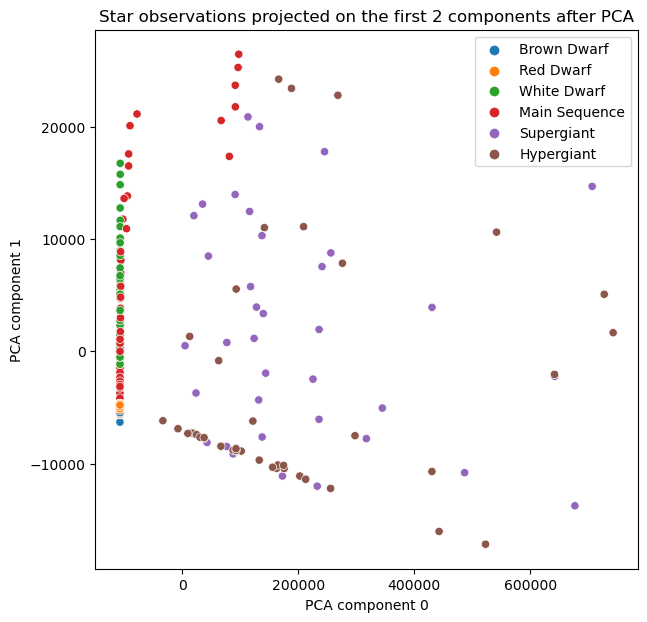

In [75]:
pc1 = eigenvalues[:, 0]
pc2 = eigenvalues[:, 1]

fig = plt.figure(figsize=(7, 7))
sns.scatterplot(x=pc1, y=pc2, hue=labels)
plt.xlabel("PCA component 0")
plt.ylabel("PCA component 1")

plt.title("Star observations projected on the first 2 components after PCA")
plt.show()

In [76]:
# Rescale the data before doing PCA
T = (T - np.mean(T)) / np.std(T)
L = (L - np.mean(L)) / np.std(L)
R = (R - np.mean(R)) / np.std(R)
M = (M - np.mean(M)) / np.std(M)

X = np.column_stack((T, L, R, M))

#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X = scaler.fit_transform(df_stars_data)


In [77]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4) 
pca.fit(X) 

eigenvalues = pca.transform(X) # compute the subspace projection of X, 4 eigenvalues for each of the 100 samples
mean = pca.mean_                # length 10 mean of the data
eigenvectors = pca.components_ # 4x10 matrix of components, multiply each by respective eigenvalue to reconstruct

# Reconstruction of object1
# Xreconstruct[0] = mean + eigenvectors*eigenvalues[0]

print(eigenvalues.shape)
print(eigenvectors.shape)
print(eigenvectors)
#print(eigenvalues)

(240, 4)
(4, 4)
[[ 0.35018343  0.55933789  0.47477107 -0.58232734]
 [ 0.82161262  0.00452564 -0.56898115  0.03453503]
 [-0.37607837  0.75509623 -0.53314117  0.06446119]
 [ 0.24675763  0.34198002  0.40818302  0.80965855]]


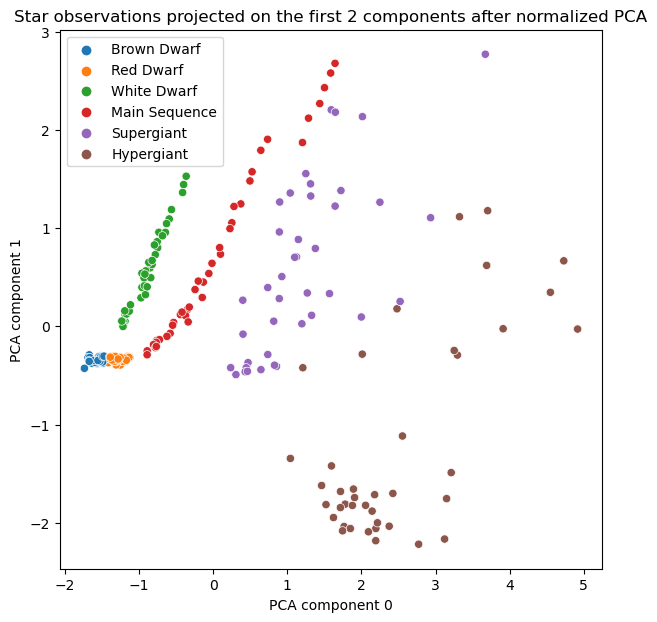

In [78]:
pc1 = eigenvalues[:, 0]
pc2 = eigenvalues[:, 1]

fig = plt.figure(figsize=(7, 7))
sns.scatterplot(x=pc1, y=pc2, hue=labels)
plt.xlabel("PCA component 0")
plt.ylabel("PCA component 1")

plt.title("Star observations projected on the first 2 components after normalized PCA")
plt.show()

In [80]:
cumulative = 0
evals = pca.explained_variance_ratio_ 
for idx, r in enumerate(evals):
    cumulative += r
    print(f"Component {idx+1} explains {100*r:.1f}% of the variance (cumulative = {100*cumulative:.1f})")

Component 1 explains 60.4% of the variance (cumulative = 60.4)
Component 2 explains 23.5% of the variance (cumulative = 83.9)
Component 3 explains 9.3% of the variance (cumulative = 93.2)
Component 4 explains 6.8% of the variance (cumulative = 100.0)


In [83]:
np.arange(4)

array([0, 1, 2, 3])

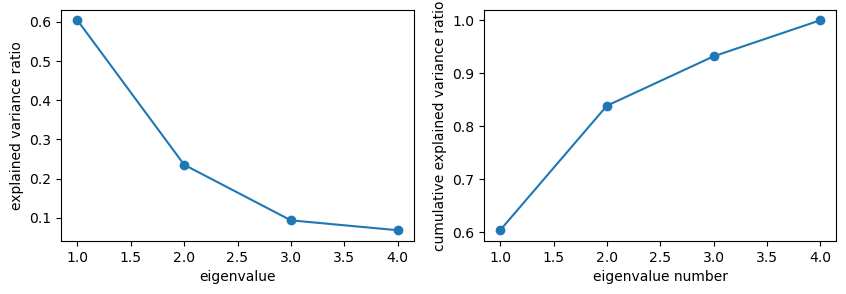

In [86]:
# Plot the results
fig = plt.figure(figsize=(10, 3))

ax = fig.add_subplot(121)

ax.plot(range(1,5), evals)
ax.scatter(range(1,5), evals)

ax.set_xlabel("eigenvalue")
ax.set_ylabel("explained variance ratio")

ax = fig.add_subplot(122)

ax.plot(range(1,5), evals.cumsum())
ax.scatter(range(1,5), evals.cumsum())

ax.set_xlabel("eigenvalue number")
ax.set_ylabel("cumulative explained variance ratio")

plt.show()